In [6]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
from deepteddy import network, activations, costs, optimizers, regularizers, layers

In [7]:
# for visualizing network performance
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

In [8]:
# load premade datasets from scikit-learn
def load_planar_datasets():
    N = 400
    circles = sklearn.datasets.make_circles(n_samples=N, factor=0.5, noise=0.3)
    moons = sklearn.datasets.make_moons(n_samples=N, noise=0.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=300, n_features=2, centers=10)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)

    return circles, moons, blobs, gaussian_quantiles

In [9]:
circles, moons, blobs, gaussian_quantiles = load_planar_datasets()

datasets = {'circles': circles,
            'moons': moons,
            'blobs': blobs,
            'gaussian_quantiles': gaussian_quantiles}

current_dataset = 'blobs'

X, Y = datasets[current_dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

if current_dataset == 'blobs':
    Y = Y%2

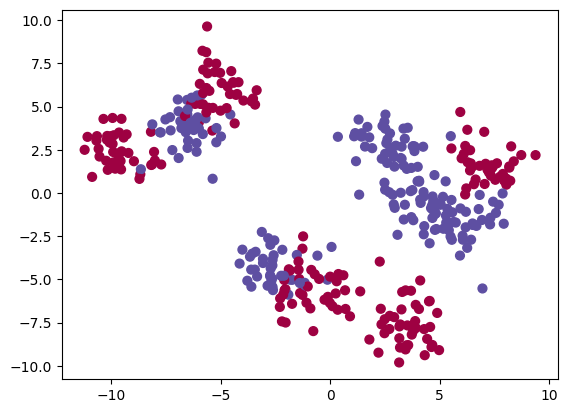

In [10]:
# visualize the data before training
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [11]:
# create a network object and add layers
net = network.Network()
net.add_layer(layers.Dense(num_nodes=40, activation=activations.ReLU(), regularizer=regularizers.L2(lmbda=0.15)))
net.add_layer(layers.Dense(num_nodes=20, activation=activations.ReLU(), regularizer=regularizers.L2(lmbda=0.15)))
net.add_layer(layers.Dense(num_nodes=Y.shape[0], activation=activations.Sigmoid(), regularizer=regularizers.L2(lmbda=0.15)))

# configure the network
net.configure_network(input_layer_size=X.shape[0], 
                      cost_func=costs.MSE(), 
                      optimizer=optimizers.Adam())

# train the network
net.train(X, Y, epochs=10000, learning_rate=0.001, minibatch_size=64, verbose=True)

Cost of epoch 1000: 0.1137
Cost of epoch 2000: 0.02551
Cost of epoch 3000: 0.03206
Cost of epoch 4000: 0.02646
Cost of epoch 5000: 0.06288
Cost of epoch 6000: 0.02911
Cost of epoch 7000: 0.04949
Cost of epoch 8000: 0.03631
Cost of epoch 9000: 0.02974
Cost of epoch 10000: 0.05647


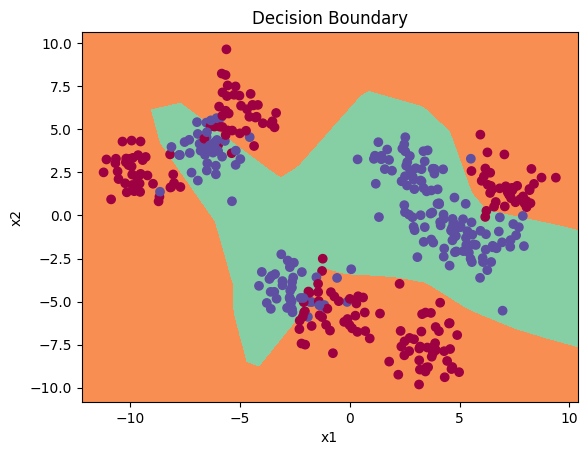

In [12]:
# plot the results
def planar_predict(X):
    A = net.predict(X)
    predictions = (A > 0.5)
    return predictions

plot_decision_boundary(lambda x: planar_predict(x.T), X, Y)
plt.title('Decision Boundary')
plt.show()